In [1]:
from oct_Utils import *

In [2]:
def read_result(path):
    df = pd.read_csv(file)
    mean_stds = json_load(str(root.parent.parent / 'tasks' / 'label_info.json'))

    for label_col, mean_std, n_class in zip(mean_stds['label_cols'], mean_stds['mean_std'], mean_stds['n_classes']):
        pred_col = f'{label_col}_prob_0'
        if n_class == 1:
            df[label_col] = df[label_col] * mean_std[1] + mean_std[0]
            df[pred_col] = df[pred_col] * mean_std[1] + mean_std[0]
    return df

In [3]:
root = Path('output/1114/disc_num_r50_512/exp-pid/results/epoch_49')
df = []
for file in root.glob('*.csv'):
    df.append(read_result(file))
df = pd.concat(df, axis=0)
df = df.drop_duplicates(subset='image_path')
print_df(df)

['image_path', 'label_num_0_reg_prob_0', 'label_pd_prob_0_prob_1', 'label_num_1_reg_prob_0', 'label_pd_prob_1_prob_1', 'label_num_2_reg_prob_0', 'label_pd_prob_2_prob_1', 'label_num_3_reg_prob_0', 'label_pd_prob_3_prob_1', 'label_num_4_reg_prob_0', 'label_pd_prob_4_prob_1', 'label_num_5_reg_prob_0', 'label_pd_prob_5_prob_1', 'label_num_6_reg_prob_0', 'label_pd_prob_6_prob_1', 'label_num_7_reg_prob_0', 'label_pd_prob_7_prob_1', 'label_num_8_reg_prob_0', 'label_pd_prob_8_prob_1', 'label_num_9_reg_prob_0', 'label_pd_prob_9_prob_1', 'label_num_10_reg_prob_0', 'label_pd_prob_10_prob_1', 'label_num_11_reg_prob_0', 'label_pd_prob_11_prob_1', 'label_num_12_reg_prob_0', 'label_pd_prob_12_prob_1', 'label_num_13_reg_prob_0', 'label_pd_prob_13_prob_1', 'label_num_14_reg_prob_0', 'label_pd_prob_14_prob_1', 'label_num_15_reg_prob_0', 'label_pd_prob_15_prob_1', 'label_num_16_reg_prob_0', 'label_pd_prob_16_prob_1', 'label_num_17_reg_prob_0', 'label_pd_prob_17_prob_1', 'label_num_18_reg_prob_0', 'label

,image_path,label_num_0_reg_prob_0,label_pd_prob_0_prob_1,label_num_1_reg_prob_0,label_pd_prob_1_prob_1,label_num_2_reg_prob_0,label_pd_prob_2_prob_1,label_num_3_reg_prob_0,label_pd_prob_3_prob_1,label_num_4_reg_prob_0,label_pd_prob_4_prob_1,label_num_5_reg_prob_0,label_pd_prob_5_prob_1,label_num_6_reg_prob_0,label_pd_prob_6_prob_1,label_num_7_reg_prob_0,label_pd_prob_7_prob_1,label_num_8_reg_prob_0,label_pd_prob_8_prob_1,label_num_9_reg_prob_0,label_pd_prob_9_prob_1,label_num_10_reg_prob_0,label_pd_prob_10_prob_1,label_num_11_reg_prob_0,label_pd_prob_11_prob_1,label_num_12_reg_prob_0,label_pd_prob_12_prob_1,label_num_13_reg_prob_0,label_pd_prob_13_prob_1,label_num_14_reg_prob_0,label_pd_prob_14_prob_1,label_num_15_reg_prob_0,label_pd_prob_15_prob_1,label_num_16_reg_prob_0,label_pd_prob_16_prob_1,label_num_17_reg_prob_0,label_pd_prob_17_prob_1,label_num_18_reg_prob_0,label_pd_prob_18_prob_1,label_num_19_reg_prob_0,label_pd_prob_19_prob_1,label_num_20_reg_prob_0,label_pd_prob_20_prob_1,label_num_21_reg_prob_0,label_pd_prob_21_prob_1,label_num_22_reg_prob_0,label_pd_prob_22_prob_1,label_num_23_reg_prob_0,label_pd_prob_23_prob_1,label_num_24_reg_prob_0,label_pd_prob_24_prob_1,label_num_25_reg_prob_0,label_pd_prob_25_prob_1,label_num_26_reg_prob_0,label_pd_prob_26_prob_1,label_num_27_reg_prob_0,label_pd_prob_27_prob_1,label_num_28_reg_prob_0,label_pd_prob_28_prob_1,label_num_29_reg_prob_0,label_pd_prob_29_prob_1,label_num_30_reg_prob_0,label_pd_prob_30_prob_1,label_num_31_reg_prob_0,label_pd_prob_31_prob_1,label_num_32_reg_prob_0,label_pd_prob_32_prob_1,label_num_33_reg_prob_0,label_pd_prob_33_prob_1,label_num_34_reg_prob_0,label_pd_prob_34_prob_1,label_num_35_reg_prob_0,label_pd_prob_35_prob_1,label_num_36_reg_prob_0,label_pd_prob_36_prob_1,label_num_37_reg_prob_0,label_pd_prob_37_prob_1,label_num_38_reg_prob_0,label_pd_prob_38_prob_1,label_num_39_reg_prob_0,label_pd_prob_39_prob_1,label_num_40_reg_prob_0,label_pd_prob_40_prob_1,label_num_41_reg_prob_0,label_pd_prob_41_prob_1,label_num_42_reg_prob_0,label_pd_prob_42_prob_1,label_num_43_reg_prob_0,label_pd_prob_43_prob_1,label_num_44_reg_prob_0,label_pd_prob_44_prob_1,label_num_45_reg_prob_0,label_pd_prob_45_prob_1,label_num_46_reg_prob_0,label_pd_prob_46_prob_1,label_num_47_reg_prob_0,label_pd_prob_47_prob_1,label_num_48_reg_prob_0,label_pd_prob_48_prob_1,label_num_49_reg_prob_0,label_pd_prob_49_prob_1,label_num_50_reg_prob_0,label_pd_prob_50_prob_1,label_num_51_reg_prob_0,label_pd_prob_51_prob_1,source,pid,dates,eye,pos,num,pd_prob,label_num_0_reg,label_pd_prob_0,label_num_1_reg,label_pd_prob_1,label_num_2_reg,label_pd_prob_2,label_num_3_reg,label_pd_prob_3,label_num_4_reg,label_pd_prob_4,label_num_5_reg,label_pd_prob_5,label_num_6_reg,label_pd_prob_6,label_num_7_reg,label_pd_prob_7,label_num_8_reg,label_pd_prob_8,label_num_9_reg,label_pd_prob_9,label_num_10_reg,label_pd_prob_10,label_num_11_reg,label_pd_prob_11,label_num_12_reg,label_pd_prob_12,label_num_13_reg,label_pd_prob_13,label_num_14_reg,label_pd_prob_14,label_num_15_reg,label_pd_prob_15,label_num_16_reg,label_pd_prob_16,label_num_17_reg,label_pd_prob_17,label_num_18_reg,label_pd_prob_18,label_num_19_reg,label_pd_prob_19,label_num_20_reg,label_pd_prob_20,label_num_21_reg,label_pd_prob_21,label_num_22_reg,label_pd_prob_22,label_num_23_reg,label_pd_prob_23,label_num_24_reg,label_pd_prob_24,label_num_25_reg,label_pd_prob_25,label_num_26_reg,label_pd_prob_26,label_num_27_reg,label_pd_prob_27,label_num_28_reg,label_pd_prob_28,label_num_29_reg,label_pd_prob_29,label_num_30_reg,label_pd_prob_30,label_num_31_reg,label_pd_prob_31,label_num_32_reg,label_pd_prob_32,label_num_33_reg,label_pd_prob_33,label_num_34_reg,label_pd_prob_34,label_num_35_reg,label_pd_prob_35,label_num_36_reg,label_pd_prob_36,label_num_37_reg,label_pd_prob_37,label_num_38_reg,label_pd_prob_38,label_num_39_reg,label_pd_prob_39,label_num_40_reg,label_pd_prob_40,label_num_41_reg,label_pd_prob_41,label_num_42_reg,label_pd_prob_42,label_num_43_reg,label_pd_prob_43

In [6]:
def roc_plot(ax, y_scores, y_tests, labels, title, root_path=None, size=(3.5, 3.5)):
    for i in range(len(y_scores)):
        fpr, tpr, thresholds = roc_curve(y_tests[i], y_scores[i], pos_label=1)
        m, l, r = bootstrap(roc_auc_score, y_tests[i], y_scores[i])
        if labels[i] == '':
            label = ''
        else:
            label = f'{labels[i]}, '
        ax.plot(fpr, tpr, lw=1, label=f'{label}AUC = {m:.3f}\n95% CI: ({l:.3f}, {r:.3f})')
    ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    ax.set_xlabel('1 - Specificity')
    ax.set_ylabel('Sensitivity')
    ax.set_title(title)
    ax.axis([-0.02, 1.02, -0.02, 1.02])
    ax.legend(loc="lower right")
    if root_path is not None:
        ensure_file(f'{root_path}')
        plt.savefig(f'{root_path}', bbox_inches='tight', format='png', dpi=300, facecolor='white', transparent=False)
        remove_alpha_channel(f'{root_path}')

def reg_plot(ax, df, y_pred_col, y_label_col, title, hue=None, fit=True, xylim=None, postfix='', root_path=None, size=(3.5, 3.5), color_dict=None, assigned_mae=None, **kwards):
    y_label = df[y_label_col].values
    y_pred = df[y_pred_col].values
    min_value = y_label.min()
    max_value = y_label.max()
    if hue is not None:
        for c, subdf in df.groupby(hue):
            y_label = subdf[y_label_col].values
            y_pred = subdf[y_pred_col].values
            mae = mean_absolute_error(y_label, y_pred)
            mse = mean_squared_error(y_label, y_pred)
            r2 = r2_score(y_label, y_pred)
            pcc = pearsonr(y_label, y_pred)
            sroc = spearmanr(y_label, y_pred)
            label = f'{c}: MAE={mae:.2f},\nR2={r2:.2f}, PCC={pcc[0]:.2f}'
            ax.scatter(y_label, y_pred, label=label, color=color_dict[c], **kwards)
            if fit:
                m, b = np.polyfit(y_label, y_pred, 1)
                ax.plot(y_label, m*y_label + b, color=color_dict[c])
    else:
        mae = mean_absolute_error(y_label, y_pred)
        mse = mean_squared_error(y_label, y_pred)
        r2 = r2_score(y_label, y_pred)
        pcc = pearsonr(y_label, y_pred)
        sroc = spearmanr(y_label, y_pred)
        if assigned_mae is not None:
            mae = assigned_mae
        label = f'MAE={mae:.2f},\nR2={r2:.2f}, PCC={pcc[0]:.2f}'
        ax.scatter(y_label, y_pred, label=label, **kwards)
        if fit:
            m, b = np.polyfit(y_label, y_pred, 1)
            ax.plot(y_label, m*y_label + b)
    diff = (max_value - min_value) / 16
    if xylim is None:
        xylim = max_value
    ax.set(xlim=(min_value - diff, xylim + diff), ylim=(min_value - diff, xylim + diff))
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Actual' + postfix, fontsize=10)
    ax.set_ylabel('AI assessed' + postfix, fontsize=10)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    ax.set_xticks(ax.get_yticks()[1:-1])
    
    l = ax.legend(loc="upper left", frameon=False)
    for legendHandle in l.legendHandles:
        legendHandle.set_alpha(1)
        legendHandle.set_sizes([10])
        
    if root_path is not None:
        ensure_file(f'{root_path}')
        plt.savefig(f'{root_path}', bbox_inches='tight', format='png', dpi=300, facecolor='white', transparent=False)
        remove_alpha_channel(f'{root_path}')

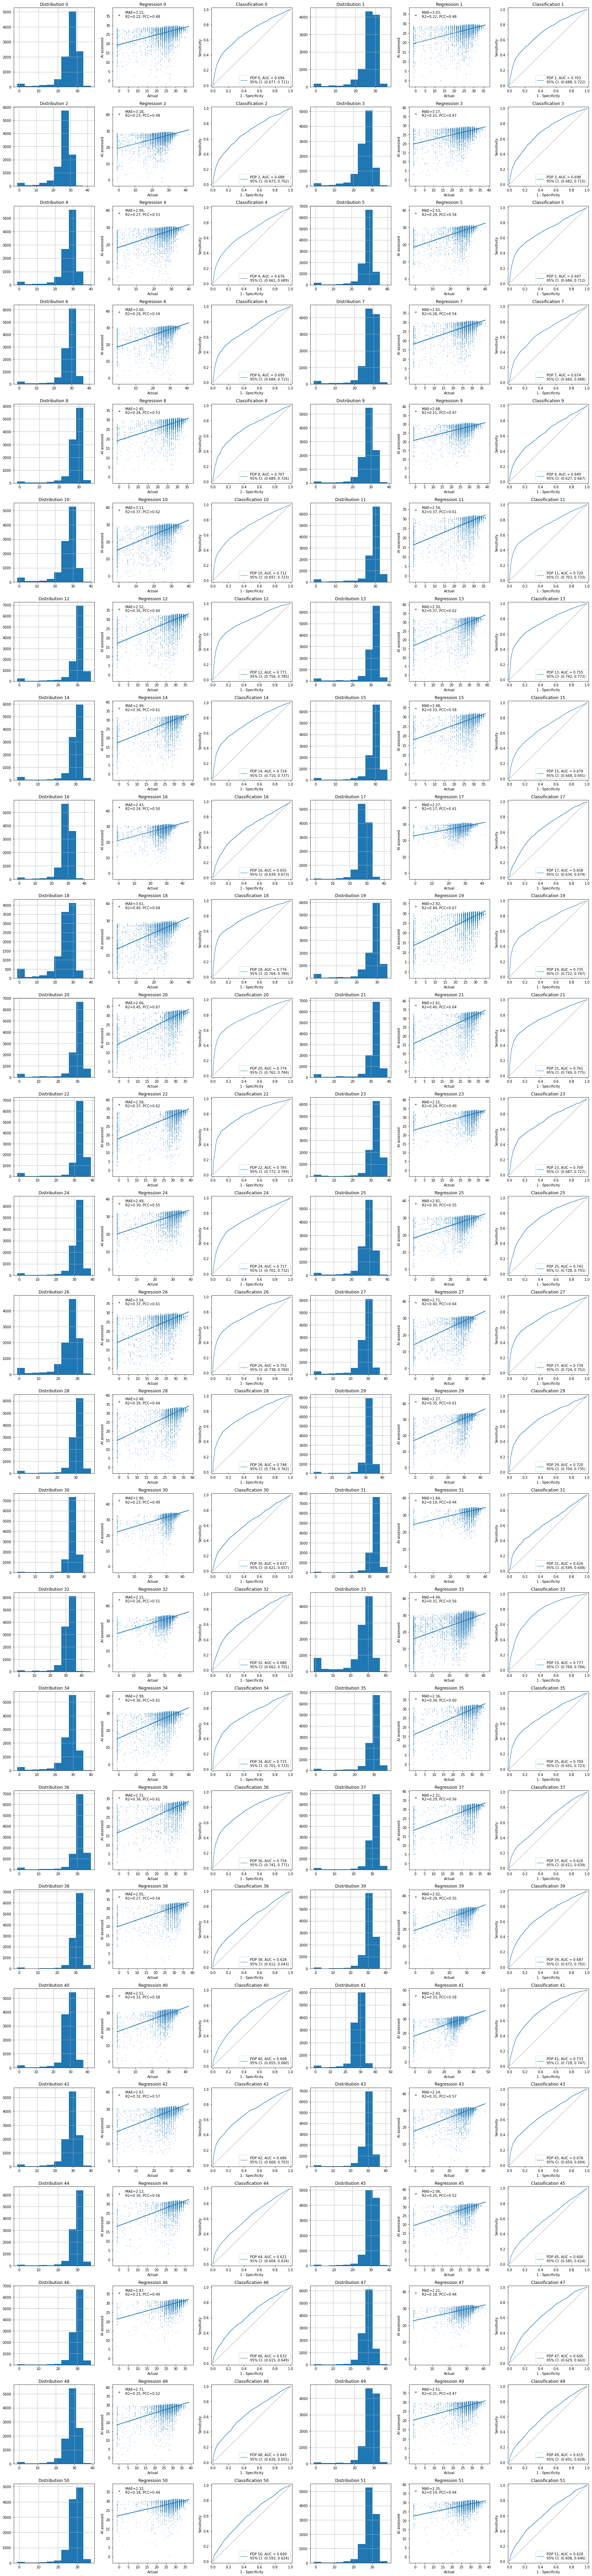

In [16]:
n_fig = 52 * 3
n_row = -(-n_fig // 6)
fig, axs = plt.subplots(n_row, 6, figsize=(24, n_row * 4))
for i in range(52):
    # distribution
    ax = axs.ravel()[3 * i]
    df[f'label_num_{i}_reg'].astype(float).hist(ax=ax)
    ax.set_title(f'Distribution {i}')
    
    # regression
    ax = axs.ravel()[3 * i + 1]
    reg_plot(ax, df, f'label_num_{i}_reg_prob_0', f'label_num_{i}_reg', f'Regression {i}', alpha=0.6, s=0.5)
    
    # classification
    ax = axs.ravel()[3 * i + 2]
    roc_plot(ax, [df[f'label_pd_prob_{i}_prob_1'].values], [df[f'label_pd_prob_{i}'].values], [f'PDP {i}'], f'Classification {i}')
plt.tight_layout()
plt.show()
plt.close(fig)

In [1]:
import pandas as pd
volume_info=pd.read_csv('volume_info.csv')

/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [9]:
total=volume_info.shape

In [7]:
a=volume_info[volume_info['oct_x']==6].shape
b=volume_info[volume_info['oct_x']==7].shape
c=volume_info[volume_info['oct_x']==3].shape

In [12]:
print(a[0]/total[0],(b[0]/total[0]),c[0]/total[0])

0.5572235478901743 0.3708883317727369 0.071797505059353
